Name: Om Patel     
Roll No: 20BCP036

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
from keras.utils import img_to_array,array_to_img,to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten
import random

In [2]:
corn_path="Plant_images/Corn_(maize)___Common_rust_"
potato_path="Plant_images/Potato___Early_blight"
tomato_path="Plant_images/Tomato___Bacterial_spot"

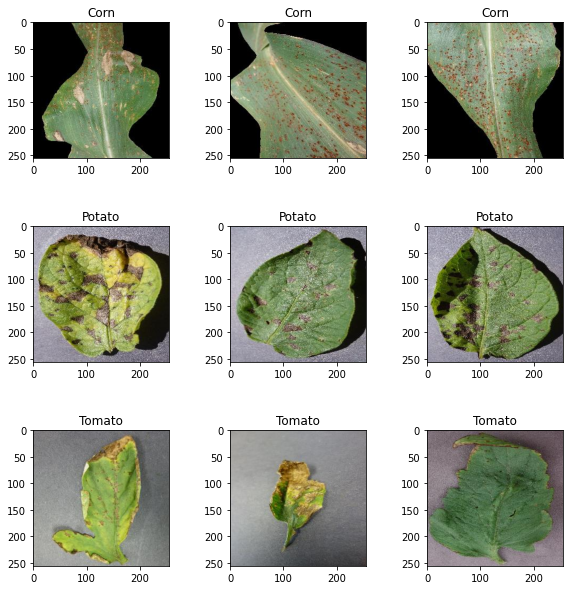

In [3]:
m=0
fig ,axes=plt.subplots(3,3,figsize=(10,10))
axes=axes.ravel()
plt.subplots_adjust(hspace=0.5)
for i in range(3):
    img=plt.imread(corn_path+'/'+random.choice(os.listdir(corn_path)))
    axes[m].imshow(img)
    axes[m].set_title('Corn')
    m=m+1
for i in range(3):
    img=plt.imread(potato_path+'/'+random.choice(os.listdir(potato_path)))
    axes[m].imshow(img)
    axes[m].set_title('Potato')
    m=m+1
for i in range(3):
    img=plt.imread(tomato_path+'/'+random.choice(os.listdir(tomato_path)))
    axes[m].imshow(img)
    axes[m].set_title('Tomato')
    m=m+1

In [4]:
def convertImgToArray(image_path):
    try:
        image=cv2.imread(image_path)
        if(image is not None):
            image=cv2.resize(image,(256,256))
            return img_to_array(image)
        else:
            return (np.array([]))
    except Exception as e:
        print('Error:',e)

In [5]:
path='F:/AI lab/NeuralNetwork/Plant_images'
root_dir=os.listdir(path)
root_dir

['Corn_(maize)___Common_rust_',
 'Potato___Early_blight',
 'Tomato___Bacterial_spot']

In [25]:
image_list,image_label=[],[]
temp=-1
for dir in root_dir:
    allImage=os.listdir(path+'/'+dir)
    temp+=1
    for file in allImage:
        newPath=path+'/'+dir+'/'+file
        image_list.append(convertImgToArray(newPath))
        image_label.append(temp)

In [26]:
np.unique(image_label,return_counts=True)

(array([0, 1, 2]), array([300, 300, 300], dtype=int64))

In [27]:
len(image_list)

900

In [28]:
image_list[0]

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  8., 12.],
        [ 0.,  4.,  3.],
        [ 0.,  1.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  4.],
        [ 0.,  1.,  0.],
        [ 9., 14., 12.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  9., 13.],
        [11., 17., 16.],
        [ 0.,  1.,  0.]],

       ...,

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]

In [29]:
norm_list=np.array(image_list,dtype=np.float16)/255.0

In [30]:
np.unique(image_label)

array([0, 1, 2])

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(norm_list,image_label,random_state=0)
ytrain

[1,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 2,
 1,
 1,
 2,
 2,
 0,
 2,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 2,
 0,
 2,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 1,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 1,
 1,


In [32]:
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)
ytrain

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [33]:
ytrain

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [15]:
model=Sequential()
model.add(Conv2D(16,(3,3),padding='same',input_shape=(256,256,3),activation='relu'))
model.add(MaxPool2D(3,3))
model.add(Conv2D(16,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(3,3))
model.add(Conv2D(16,(3,3),padding='same',activation='relu'))
model.add(Conv2D(16,(3,3),padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(8,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        2

In [34]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
hist=model.fit(xtrain,ytrain,epochs=3,batch_size=32,validation_split=0.2)

Epoch 1/3
17/17 [==============================] - 19s 860ms/step - loss: 0.8722 - accuracy: 0.5315 - val_loss: 0.5072 - val_accuracy: 0.6444
Epoch 2/3
17/17 [==============================] - 18s 1s/step - loss: 0.4011 - accuracy: 0.7148 - val_loss: 0.2938 - val_accuracy: 0.8370
Epoch 3/3
17/17 [==============================] - 18s 1s/step - loss: 0.2061 - accuracy: 0.9241 - val_loss: 0.1697 - val_accuracy: 0.9185


In [36]:
model.evaluate(xtest,ytest)

8/8 [==============================] - 2s 277ms/step - loss: 0.2435 - accuracy: 0.9244


[0.24350745975971222, 0.9244444370269775]

In [37]:
pred=model.predict(xtest)

8/8 [==============================] - 2s 244ms/step


In [39]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.8043461005241749

In [38]:
np.argmax(pred,axis=1)

array([1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2,
       1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 0, 0, 1,
       2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2,
       1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 2, 1,
       0, 1, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 2,
       0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2,
       1, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1,
       0, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 2, 2, 1, 2, 2, 0, 0,
       1, 0, 1, 1, 0], dtype=int64)